In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
import time

!nvidia-smi
os.environ["CUDA_VISIBLE_DEVICES"]="3"

Sun Jan 14 15:28:47 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A5000    Off  | 00000000:1B:00.0 Off |                    0 |
| 37%   65C    P2   216W / 230W |  16686MiB / 23028MiB |     82%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX A5000    Off  | 00000000:1C:00.0 Off |                  Off |
| 42%   

In [2]:
def sample_from_sphere(n, k):
    x = torch.randn(n, k).cuda()
    x = F.normalize(x, dim=1)
    r = torch.rand(n, 1).cuda() ** (1/k)
    x = x * r
    return x

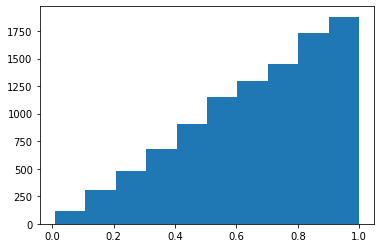

In [7]:
n = 10000
k = 2
x = torch.rand(n, 1).cuda() ** (1/k)
x = x.reshape(-1).data.cpu().numpy()

import matplotlib.pyplot as plt
plt.hist(x)
plt.show()